In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
outlier = pd.read_csv("Files/datasets/placement.csv")
outlier.columns = ["cgpa", "placement_marks", "placed"]
outlier.head()

,cgpa,placement_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='cgpa', ylabel='placement_marks'>

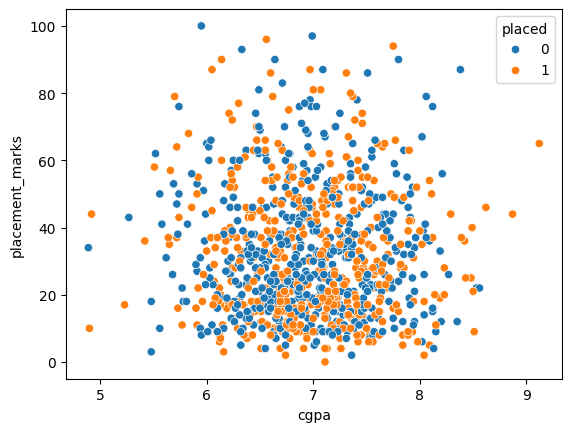

In [3]:
sns.scatterplot(outlier, x="cgpa", y="placement_marks", hue="placed")

In [4]:
from ydata_profiling import ProfileReport

pr = ProfileReport(outlier)
pr.to_file("Files/index1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 3450.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
outlier.drop_duplicates(inplace=True)

In [6]:
outlier.isna().sum()

cgpa               0
placement_marks    0
placed             0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

x = outlier.drop("placed", axis=1)
y = outlier["placed"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [8]:
X_train.shape, X_test.shape

((686, 2), (295, 2))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
X_train_scaled

,cgpa,placement_marks
0,-0.462060,0.787495
1,0.201029,-1.227268
2,-0.544947,0.522395
3,-1.091996,1.476756
4,0.748078,1.317696
...,...,...
681,1.527209,-1.280288
682,-0.495215,0.310314
683,-0.561524,0.363334
684,0.234184,1.847896


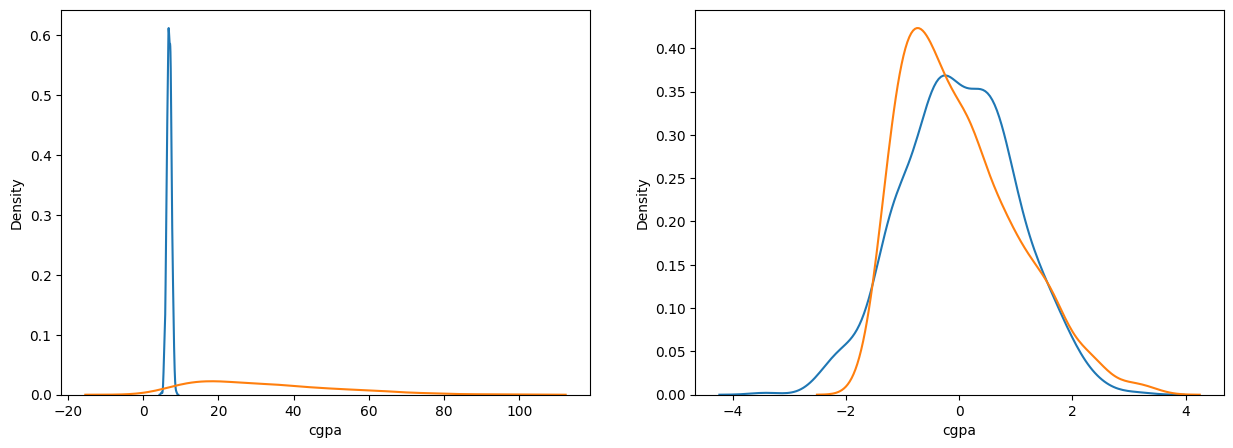

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(X_train, x="cgpa", ax=ax1)
sns.kdeplot(X_train, x="placement_marks", ax=ax1)

sns.kdeplot(X_train_scaled, x="cgpa", ax=ax2)
sns.kdeplot(X_train_scaled, x="placement_marks", ax=ax2)

plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
modal = LogisticRegression()
modal_scaled = LogisticRegression()

In [15]:
modal.fit(X_train, y_train)
modal_scaled.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y_pred = modal.predict(X_test)
y_pred_scaled = modal_scaled.predict(X_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score

acc1 = accuracy_score(y_test, y_pred)
acc2 = accuracy_score(y_test, y_pred_scaled)

print(f"Original: {acc1} \nScaled: {acc2}")

Original: 0.5050847457627119 
Scaled: 0.5050847457627119


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier()

In [19]:
knn.fit(X_train, y_train)
knn_scaled.fit(X_train_scaled, y_train)

k_pred = knn.predict(X_test)
k_pred_scaled = knn.predict(X_test_scaled)

In [20]:
k1 = accuracy_score(y_test, k_pred)
k2 = accuracy_score(y_test, y_pred_scaled)

print(f"Original: {k1} \nScaled: {k2}")

Original: 0.4542372881355932 
Scaled: 0.5050847457627119


In [21]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

X_train_minmax = scale.fit_transform(X_train)
X_test_minmax = scale.transform(X_test)

In [22]:
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X_test.columns)

In [23]:
lr1 = LogisticRegression()
lr1_scaled = LogisticRegression()

knn1 = KNeighborsClassifier()
knn1_scaled = KNeighborsClassifier()

In [24]:
lr1.fit(X_train, y_train)
lr1_scaled.fit(X_train_minmax, y_train)

knn1.fit(X_train, y_train)
knn1_scaled.fit(X_train_minmax, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
l_pred = lr1.predict(X_test)
l_pred_scaled = lr1_scaled.predict(X_test_scaled)

k_pred = knn1.predict(X_test)
k_pred_scaled = knn1_scaled.predict(X_test_scaled)

In [26]:
lcc1 = accuracy_score(y_test, l_pred)
lcc2 = accuracy_score(y_test, l_pred_scaled)

kcc1 = accuracy_score(y_test, k_pred)
kcc2 = accuracy_score(y_test, k_pred_scaled)

print(f"Logistic Regression:\n  Original: {lcc1}\n  Scaled: {lcc2}")
print(f"KNN:\n  Original: {kcc1}\n  Scaled: {kcc2}")

Logistic Regression:
  Original: 0.5050847457627119
  Scaled: 0.5084745762711864
KNN:
  Original: 0.4542372881355932
  Scaled: 0.46440677966101696


In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_minmax, y_train)
rf_pred = rf.predict(X_test_minmax)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.5084745762711864
